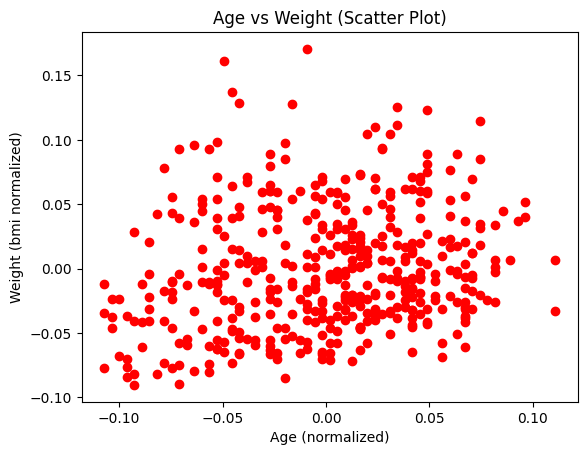

Final slope (m): [0.0008356]
Final intercept (c): [-1.94342971e-16]


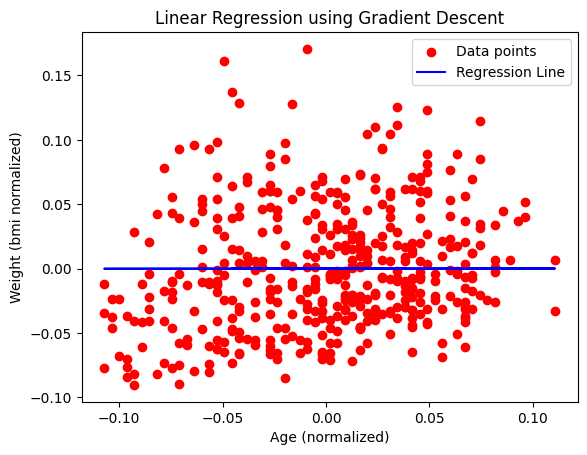

array([[ 3.18161189e-05],
       [-1.57260765e-06],
       [ 7.12755231e-05],
       [-7.44207383e-05],
       [ 4.49806991e-06],
       [-7.74560771e-05],
       [-3.79966730e-05],
       [ 5.30634904e-05],
       [ 3.48514577e-05],
       [-5.92440445e-05],
       [-8.04914159e-05],
       [ 2.27101026e-05],
       [ 1.36040862e-05],
       [ 4.49806991e-06],
       [ 3.78867965e-05],
       [-4.40673506e-05],
       [-4.60794643e-06],
       [ 5.91341679e-05],
       [-3.19259954e-05],
       [-2.28199791e-05],
       [-4.10320118e-05],
       [-7.13853996e-05],
       [-7.13853996e-05],
       [ 3.78867965e-05],
       [-5.31733669e-05],
       [-5.62087057e-05],
       [-8.95974322e-05],
       [-1.97846403e-05],
       [ 4.39574740e-05],
       [ 5.60988292e-05],
       [-5.01380281e-05],
       [-1.97846403e-05],
       [ 2.87807801e-05],
       [ 2.57454414e-05],
       [ 1.36040862e-05],
       [ 4.09221353e-05],
       [ 1.05687475e-05],
       [-7.64328521e-06],
       [-1.5

In [1]:
# -------------------------------------------------------
# IMPORTS
# -------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes


# -------------------------------------------------------
# LOAD INBUILT DATASET INSTEAD OF CSV
# -------------------------------------------------------
# ORIGINAL (commented)
# data = pd.read_csv("age data.csv")

# Use diabetes dataset, contains 'age' and 'bmi'
dataset = load_diabetes()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# Select two columns similar to Age & Weight
data = data[["age", "bmi"]]
data.columns = ["Age", "Weight"]  # Rename to match your code


# -------------------------------------------------------
# EXTRACT X AND Y
# -------------------------------------------------------
X = data["Age"]
y = data["Weight"]

# Convert to numpy for gradient descent
X_n = np.array(X)
y_n = np.array(y)

# Important: reshape as COLUMN vectors, not ROW
X_r = X_n.reshape(-1, 1)   # shape (n, 1)
y_r = y_n.reshape(-1, 1)   # shape (n, 1)

plt.scatter(X_r, y_r, c='r')
plt.title("Age vs Weight (Scatter Plot)")
plt.xlabel("Age (normalized)")
plt.ylabel("Weight (bmi normalized)")
plt.show()


# -------------------------------------------------------
# GRADIENT DESCENT IMPLEMENTATION
# -------------------------------------------------------
m = 0               # slope
c = 0               # intercept
L = 0.001           # learning rate
epochs = 1000
n = float(len(X_r)) # number of data points


# GRADIENT DESCENT LOOP
for i in range(epochs):
    y_pred = m * X_r + c

    D_m = (-2/n) * sum(X_r * (y_r - y_pred))  # derivative wrt m
    D_c = (-2/n) * sum(y_r - y_pred)          # derivative wrt c

    m = m - L * D_m
    c = c - L * D_c


print("Final slope (m):", m)
print("Final intercept (c):", c)


# -------------------------------------------------------
# FINAL PREDICTION LINE
# -------------------------------------------------------
y_pred_line = m * X_r + c

plt.scatter(X_r, y_r, color='red', label='Data points')
plt.plot(X_r, y_pred_line, color='blue', label='Regression Line')

plt.title("Linear Regression using Gradient Descent")
plt.xlabel("Age (normalized)")
plt.ylabel("Weight (bmi normalized)")
plt.legend()
plt.show()


# -------------------------------------------------------
# SHOW FINAL PREDICTIONS
# -------------------------------------------------------
y_pred_line
